In [1]:
import sys

sys.path += ['../src']

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from data_structures.constants import TickCol, BarCol
import data_structures.bars as bars

In [3]:
df = pd.read_csv('../data/trade_20220920.csv')
df = df[df['symbol'] == 'XBTUSD']

In [4]:
df

,timestamp,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional
132123,2022-09-20D00:00:00.277243000,XBTUSD,Sell,1600,19533.0,MinusTick,2bf699c8-4be5-a685-0c6d-3ea2ba9ad2b6,8191264,0.081913,1600.0
132124,2022-09-20D00:00:00.277243000,XBTUSD,Sell,100,19533.0,ZeroMinusTick,1354a777-6fa2-a06a-c733-1fffcdc4dc4f,511954,0.005120,100.0
132125,2022-09-20D00:00:00.277243000,XBTUSD,Sell,300,19533.0,ZeroMinusTick,489c2611-8dbc-a395-fca4-871989aac8bc,1535862,0.015359,300.0
132126,2022-09-20D00:00:00.277243000,XBTUSD,Sell,7500,19533.0,ZeroMinusTick,20ee6efc-d658-9bd3-4788-f88896181625,38396550,0.383966,7500.0
132127,2022-09-20D00:00:00.277243000,XBTUSD,Sell,200,19533.0,ZeroMinusTick,4ed84ae3-20f3-45ee-68f5-830a46632486,1023908,0.010239,200.0
...,...,...,...,...,...,...,...,...,...,...
217519,2022-09-20D23:58:27.766381000,XBTUSD,Sell,400,18867.5,ZeroPlusTick,b08690cd-e643-f696-de40-dbbe060cfbcc,2120048,0.021200,400.0
217520,2022-09-20D23:58:27.766381000,XBTUSD,Sell,300,18864.5,MinusTick,b1779cae-9dd0-9dd1-ef3f-e4abfc8dc236,1590288,0.015903,300.0
217521,2022-09-20D23:59:13.097123000,XBTUSD,Buy,100,18865.0,PlusTick,ae33d14a-2cf9-8960-f1f3-65d2bf65e151,530082,0.005301,100.0
217522,2022-09-20D23:59:51.227242000,XBTUSD,Buy,100,18869.5,PlusTick,e81d83fc-27cc-23a8-667e-cc34f29b85c6,529956,0.005300,100.0


In [6]:
tick_dirs = bars._compute_tick_rule(df, -1)

In [7]:
tick_dirs

array([-1., -1., -1., ...,  1.,  1.,  1.])

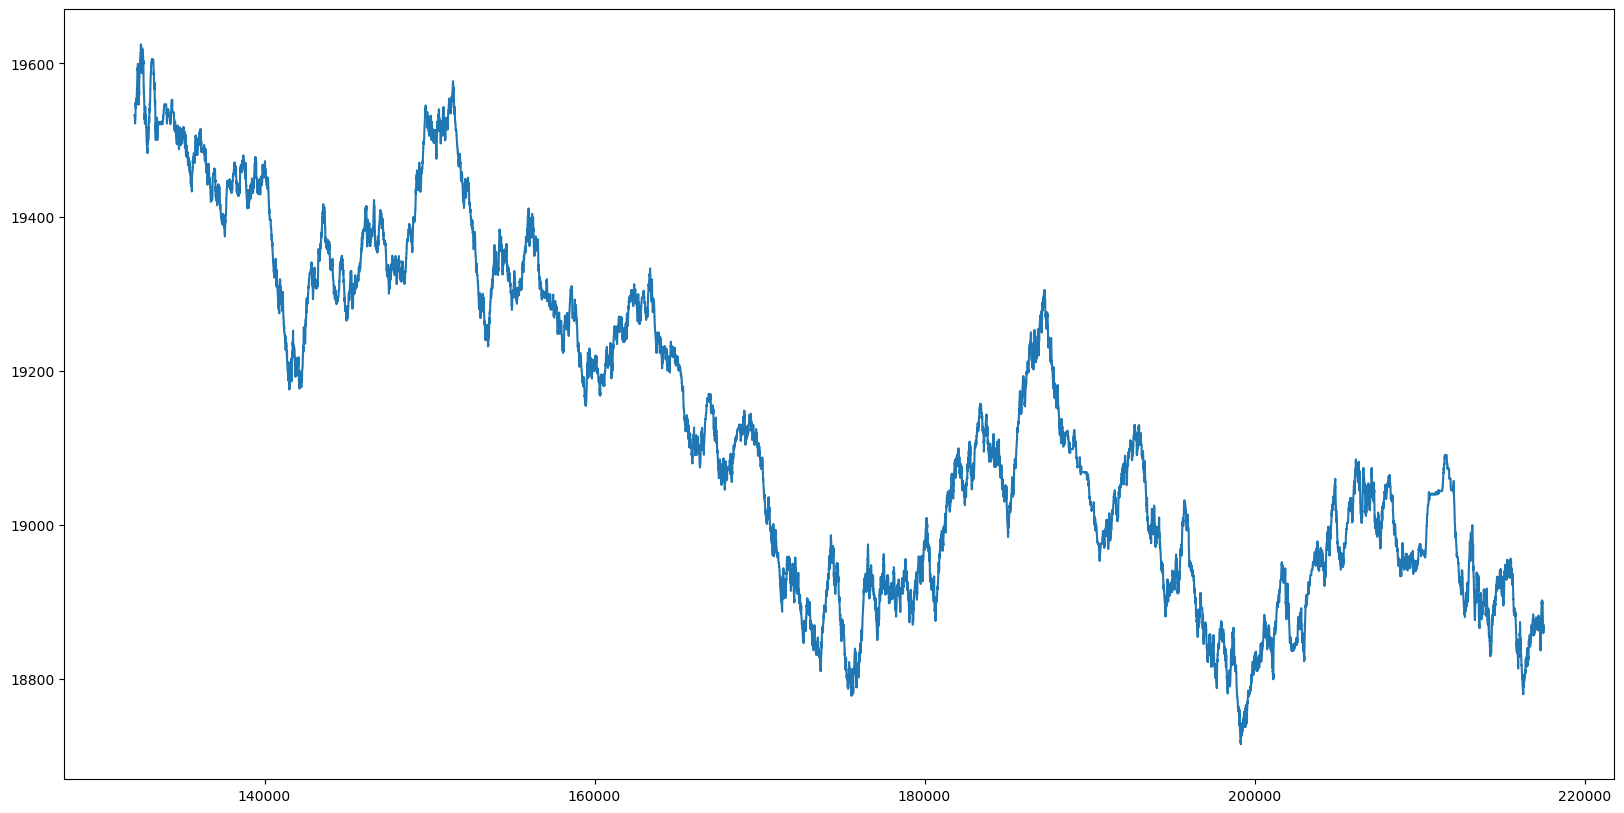

In [11]:
_ = plt.figure(figsize=(20, 10))
plt.plot(df['price'])